# 2.- Análisis Dataset

In [1]:
# -*- coding: utf-8 -*-

#Imports
import pandas as pd
import csv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

In [18]:
#Buscamos todos los csv procesados anteriormente
extension = 'csv'
csv_files = [i for i in glob.glob('*.{}'.format(extension))]
print(csv_files)

['clean_data_11_noviembre2015.csv', 'clean_data_08_agosto2015.csv', 'clean_data_06_junio2015.csv', 'clean_data_09_septiembre2015.csv', 'clean_data_07_julio2015.csv', 'clean_data_04_abril2015.csv', 'clean_data_05_mayo2015.csv', 'clean_data_10_octubre2015.csv', 'clean_data_03_marzo2015.csv', 'clean_data_01_enero2015.csv', 'clean_data_12_diciembre2015.csv', 'clean_data_02_febrero2015.csv']


In [19]:
#Concatenamos los csv en un solo dataframe 
colnames=['fecha', 'dia_semana', 'hora', 'id_tramo','des_tramo','estado','longitud','latitud']
big_frame = pd.concat([pd.read_csv(f, sep=';',names=colnames) for f in csv_files])

In [20]:
big_frame

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-04-11,Sábado,12:30:01,A101,"EN CORTS, CARRERA",0,-0.364338,39.453003
1,2015-04-11,Sábado,12:30:01,A102,ERNESTO FERRER,320,-0.354378,39.471478
2,2015-04-11,Sábado,12:30:01,A104,EUGENIA VIÑES,444,-0.325181,39.467414
3,2015-04-11,Sábado,12:30:01,A167,NICASIO BENLLOCH,517,-0.390403,39.488247
4,2015-04-11,Sábado,12:30:01,A168,NICASIO BENLLOCH,559,-0.400075,39.495816
...,...,...,...,...,...,...,...,...
1031231,2015-02-21,Sábado,14:45:01,B93,REINA DOÑA GERMANA,180,-0.365681,39.463985
1031232,2015-02-21,Sábado,14:45:01,B94,RIO TAJO,39,-0.329917,39.476542
1031233,2015-02-21,Sábado,14:45:01,B95,RODRÍGUEZ DE CEPEDA,157,-0.352085,39.468331
1031234,2015-02-21,Sábado,14:45:01,B97,SAGASTA,261,-0.373892,39.469853


In [21]:
big_frame['estado'] = pd.to_numeric(big_frame['estado'], errors="coerce")
big_frame['estado'] = big_frame['estado'].fillna(0).astype(np.int64)

In [22]:
#Tipo de datos
big_frame.dtypes

fecha          object
dia_semana     object
hora           object
id_tramo       object
des_tramo      object
estado          int64
longitud      float64
latitud       float64
dtype: object

In [23]:
#Contamos todas las filas
big_frame.count()

fecha         12311384
dia_semana    12311384
hora          12311384
id_tramo      12311384
des_tramo     12311384
estado        12311384
longitud      12311384
latitud       12311384
dtype: int64

In [19]:
#Comprobamos si existe algún valor nulo en el dataframe
big_frame.isna().sum()

fecha         0
dia_semana    0
hora          0
id_tramo      0
des_tramo     0
estado        0
longitud      0
latitud       0
dtype: int64

In [28]:
#Filas Totales del Dataset
print('Dataset Shape:    ',big_frame.shape)

#Contamos valores duplicados 
dup = big_frame.duplicated().sum()
print('Filas Duplicadas: ',dup)

Dataset Shape:     (12311384, 8)
Filas Duplicadas:  85284


In [29]:
#Eliminamos Filas Duplicadas
big_frame.drop_duplicates(inplace=True)
print('Dataset Shape:    ',big_frame.shape)

Dataset Shape:     (12226100, 8)


In [30]:
#Comprobamos si existe algún valor nulo en el dataframe
big_frame.isna().sum()

fecha         0
dia_semana    0
hora          0
id_tramo      0
des_tramo     0
estado        0
longitud      0
latitud       0
dtype: int64

In [31]:
#Comprobación si existe algún valor menor a cero en la columna estado
negativo = big_frame['estado'][big_frame.estado < 0].count()
print('Valores Negativos Columna Estado = ',negativo)

Valores Negativos Columna Estado =  0


In [34]:
#Filtrar aquellos datos con estado > 0 y ordenamos por fecha y hora
big_frame_filter1 = big_frame[big_frame.estado > 0].sort_values(by=['fecha','hora'], ascending=True)

In [37]:
big_frame_filter1.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
461852,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
461853,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
461854,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
461855,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
461856,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994


In [33]:
print('Valores por Columna')
print('-'*20)
print(big_frame_filter1.count())
print('-'*20)
print('Dimensión DataFrame -> ',big_frame_filter1.shape)
print('-'*20)

Valores por Columna
--------------------
fecha         11817827
dia_semana    11817827
hora          11817827
id_tramo      11817827
des_tramo     11817827
estado        11817827
longitud      11817827
latitud       11817827
dtype: int64
--------------------
Dimensión DataFrame ->  (11817827, 8)
--------------------


In [38]:
print('-'*20)
print('Dimensión DataFrame -> ',big_frame_filter1.shape)
print('-'*20)

--------------------
Dimensión DataFrame ->  (11817827, 8)
--------------------


In [40]:
#Resumen estadístico de la columna estado
big_frame_filter1['estado'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
estado,11817827.0,809.592015,1093.228395,1.0,98.0,346.0,1059.0,17982.0


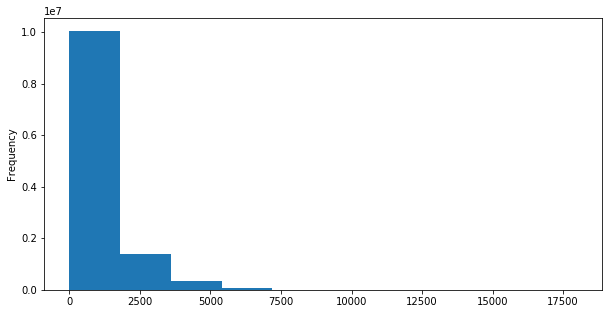

In [41]:
#Mostramos las frequencias de estado en una gráfica
big_frame_filter1['estado'].plot(bins=10, kind="hist",figsize=(10,5))

In [42]:
#Buscamos la fecha,hora,día y la calle con más tráfico registrado
df_filter1 = big_frame_filter1['estado'] == big_frame_filter1['estado'].max()
big_frame_filter1[['fecha','hora','dia_semana','id_tramo','des_tramo','estado']][df_filter1]

,fecha,hora,dia_semana,id_tramo,des_tramo,estado
339047,2015-05-21,23:00:01,Jueves,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
816555,2015-05-21,23:15:01,Jueves,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
1147393,2015-05-21,23:30:01,Jueves,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
465945,2015-05-21,23:45:01,Jueves,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
1025853,2015-05-22,00:00:01,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
184091,2015-05-22,00:15:01,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
524987,2015-05-22,00:30:01,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
1129231,2015-05-22,00:45:01,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
644719,2015-05-22,01:00:02,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982
615879,2015-05-22,01:15:01,Viernes,A398,HNOS MACHADO(JUAN XXIII-CONST),17982


In [15]:
big_frame2 = pd.read_csv('/Users/josemarti/Documents/TFM/csv_bigdata/datos_filtrados.csv', sep=';')
big_frame2.head(10)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994
5,2015-01-01,Jueves,00:15:01,A13,ALBORAIA,40,-0.368968,39.485116
6,2015-01-01,Jueves,00:15:01,A130,HERNAN CORTES,55,-0.371882,39.469184
7,2015-01-01,Jueves,00:15:01,A131,ISABEL DE VILLENA,16,-0.325794,39.479083
8,2015-01-01,Jueves,00:15:01,A132,ISABEL LA CATOLICA,18,-0.371171,39.469726
9,2015-01-01,Jueves,00:15:01,A133,ISLAS CANARIAS,49,-0.335863,39.461000


In [54]:
#Tipo de datos
big_frame2.dtypes

fecha          object
dia_semana     object
hora           object
id_tramo       object
des_tramo      object
estado          int64
longitud      float64
latitud       float64
dtype: object

In [55]:
big_frame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817827 entries, 0 to 11817826
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fecha       object 
 1   dia_semana  object 
 2   hora        object 
 3   id_tramo    object 
 4   des_tramo   object 
 5   estado      int64  
 6   longitud    float64
 7   latitud     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 721.3+ MB


In [56]:
big_frame2['estado'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
estado,11817827.0,809.592015,1093.228395,1.0,98.0,346.0,1059.0,17982.0


In [57]:
#Contamos todas las filas
big_frame2.count()

fecha         11817827
dia_semana    11817827
hora          11817827
id_tramo      11817827
des_tramo     11817827
estado        11817827
longitud      11817827
latitud       11817827
dtype: int64

In [58]:
#Comprobamos si existe algún valor nulo en el dataframe
big_frame2.isna().sum()

fecha         0
dia_semana    0
hora          0
id_tramo      0
des_tramo     0
estado        0
longitud      0
latitud       0
dtype: int64

In [59]:
#Comprobación si existe algún valor menor a cero en la columna estado
negativo = big_frame2['estado'][big_frame2.estado < 0].count()
print('Valores Negativos Columna Estado = ',negativo)

Valores Negativos Columna Estado =  0


In [60]:
#Comprobación si existe algún valor igual a cero en la columna estado
cero = big_frame2['estado'][big_frame2.estado == 0].count()
print('Valores Cero Columna Estado = ',cero)

Valores Cero Columna Estado =  0


In [61]:
shape = big_frame2.shape
print('Dataset Shape:    ',shape)

dupli = big_frame2.duplicated().sum()
print('Filas Duplicadas: ',dupli)

Dataset Shape:     (11817827, 8)
Filas Duplicadas:  0


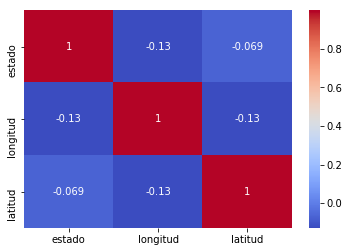

In [62]:
#Correlación
sns.heatmap(data=big_frame2.astype({'estado': 'int64'}).corr(),annot=True, cmap='coolwarm');

In [63]:
#Agrupamos por fecha y media de la columna estado
df_filter2 = big_frame2.groupby(big_frame2['fecha']).estado.mean()

#10 Valores con mayor media
df_date = df_filter2.sort_values(ascending=False).to_frame().head(10)
df_date.reset_index()

,fecha,estado
0,2015-09-29,1638.717109
1,2015-09-25,1475.486227
2,2015-11-09,1453.500845
3,2015-09-22,1429.115099
4,2015-02-08,1341.575682
5,2015-01-08,1341.575682
6,2015-10-20,1317.342945
7,2015-03-12,1303.176215
8,2015-10-16,1293.494030
9,2015-04-21,1271.678716


Text(0, 0.5, 'tráfico')

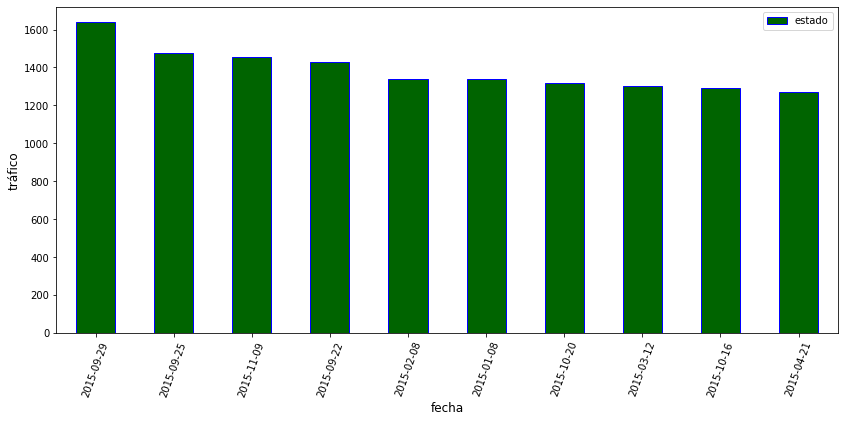

In [21]:
#Mostrando en un gráfico los días con media de tráfico más alta
df_date.plot.bar(color='darkgreen',edgecolor='blue',figsize=(14,6))
plt.xticks(rotation=70)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)

In [64]:
#Agrupamos por día de la semana
week_days = [ 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_filter3 = big_frame2.groupby(big_frame2['dia_semana']).estado.mean().reindex(week_days) 

#Valores con mayor media
df_day = df_filter3.to_frame()
df_day.reset_index()

,dia_semana,estado
0,Lunes,842.428084
1,Martes,838.947633
2,Miércoles,875.684213
3,Jueves,821.097058
4,Viernes,857.395718
5,Sábado,732.732248
6,Domingo,699.030915


Text(0, 0.5, 'tráfico')

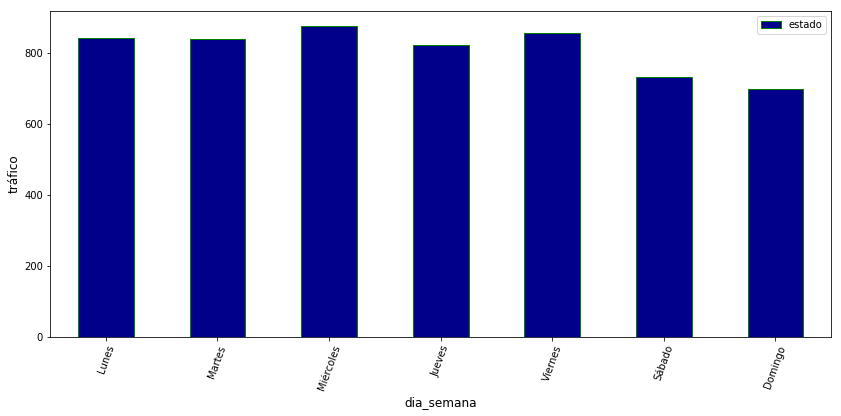

In [65]:
#Mostrando en un gráfico la media por días
df_day.plot.bar(color='darkblue',edgecolor='green',figsize=(14,6))
plt.xticks(rotation=70)
plt.xlabel('dia_semana',fontsize=12)
plt.ylabel('tráfico',fontsize=12)

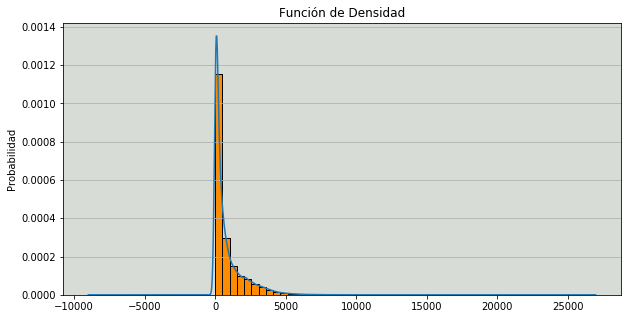

In [24]:
#Función Densidad
fig, ax = plt.subplots()
big_frame2['estado'].plot.kde(bw_method=0.1,ax=ax, legend=False, title='Función de Densidad')
big_frame2['estado'].plot.hist(density=True, ax=ax,bins=35,color='darkorange',edgecolor='black',figsize=(10,5))
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


### PySpark

In [3]:
#Añadimos pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
from pyspark.sql import SparkSession

In [4]:
'''spark = SparkSession.builder.master("local").appName("SQL")\
                    .config("spark.driver.memory", '100g')\
                    .config('spark.executor.memory', '100g')\
                    .config('spark.dynamicAllocation.enabled', True)\
                    .config('spark.dynamicAllocation.maxExecutors', 25)\
                    .config('spark.driver.memoryOverhead','512')\
                    .config('spark.executor.memoryOverhead', '512')\
                    .config("spark.sql.autoBroadcastJoinThreshold", "-1")\
                    .getOrCreate()'''

spark = SparkSession.builder.master("local")\
                    .appName("SQL")\
                    .getOrCreate()

datos_csv = '/Users/josemarti/Documents/TFM/csv_bigdata/datos_filtrados.csv'

sparkDF = spark.read.csv(datos_csv,sep=";",inferSchema=True, header=True)

In [5]:
#Creación Tabla Temporal Tráfico
sparkDF.createOrReplaceTempView("trafico")

#Realizamos la siguiente consulta
query1 = "SELECT * FROM trafico"

#Mostramos los resultados de las 10 primeras filas
df_spark = spark.sql(query1).show(10)
df_spark

+----------+----------+--------+--------+--------------------+------+--------------------+-----------------+
|     fecha|dia_semana|    hora|id_tramo|           des_tramo|estado|            longitud|          latitud|
+----------+----------+--------+--------+--------------------+------+--------------------+-----------------+
|2015-01-01|    Jueves|00:15:01|    A102|      ERNESTO FERRER|    37|-0.35437838198609495|39.47147835741698|
|2015-01-01|    Jueves|00:15:01|    A104|       EUGENIA VIÑES|    33|  -0.325180858768075| 39.4674141947662|
|2015-01-01|    Jueves|00:15:01|    A124|   GUILLEM DE CASTRO|   139|  -0.383419190245633|39.47039591991992|
|2015-01-01|    Jueves|00:15:01|    A127|   GUILLEM DE CASTRO|   187|-0.38414999407094397|39.47567727076167|
|2015-01-01|    Jueves|00:15:01|    A122|GRAN VIA RAMON Y ...|   218|  -0.335823864828404|39.46099418685265|
|2015-01-01|    Jueves|00:15:01|     A13|            ALBORAIA|    40|-0.36896799549695797|39.48511609354037|
|2015-01-01|    Jue

In [6]:
print('Columnas: ',sparkDF.columns)
print('Filas: ',sparkDF.count())

Columnas:  ['fecha', 'dia_semana', 'hora', 'id_tramo', 'des_tramo', 'estado', 'longitud', 'latitud']
Filas:  11817827


In [7]:
sparkDF.printSchema()

root
 |-- fecha: string (nullable = true)
 |-- dia_semana: string (nullable = true)
 |-- hora: string (nullable = true)
 |-- id_tramo: string (nullable = true)
 |-- des_tramo: string (nullable = true)
 |-- estado: integer (nullable = true)
 |-- longitud: double (nullable = true)
 |-- latitud: double (nullable = true)



In [8]:
sparkDF.describe(['estado']).show()

+-------+-----------------+
|summary|           estado|
+-------+-----------------+
|  count|         11817827|
|   mean|809.5920146741021|
| stddev|1093.228394911496|
|    min|                1|
|    max|            17982|
+-------+-----------------+



In [14]:
query2 = 'SELECT id_tramo,des_tramo,count(id_tramo) as tramo FROM trafico GROUP BY id_tramo,des_tramo ORDER BY 1'
df_spark1 = spark.sql(query2)
df_spark1.toPandas()

,id_tramo,des_tramo,tramo
0,A1,ACCESO BARCELONA Entre V-21 y Ronda Norte,29578
1,A10,"ALAMEDA, PASEO DE",29527
2,A102,ERNESTO FERRER,29414
3,A104,EUGENIA VIÑES,29537
4,A105,FILIPINAS,29498
...,...,...,...
398,B93,REINA DOÑA GERMANA,28466
399,B94,RIO TAJO,29133
400,B95,RODRÍGUEZ DE CEPEDA,28979
401,B97,SAGASTA,28704


In [29]:
current_init = datetime.datetime.now()
print (current_init.strftime("%H:%M:%S"))

17:45:06


In [30]:
query3 = "SELECT \
            to_date(fecha,'yyyy-mm-dd') as fecha,\
            hora,\
            dia_semana as dia,\
            id_tramo,\
            avg(estado) as media\
            FROM trafico \
            WHERE to_date(fecha,'yyyy-mm-dd') >= '2015-01-01'\
            AND to_date(fecha,'yyyy-mm-dd') <= '2015-12-31'\
            GROUP BY fecha,hora,dia_semana,id_tramo \
            HAVING avg(estado) < 3256.5\
            ORDER BY 1,2,3"
df_spark2 = spark.sql(query3)
df_spark2.show()

+----------+--------+-----+--------+------+
|     fecha|    hora|  dia|id_tramo| media|
+----------+--------+-----+--------+------+
|2015-01-01|00:00:01|Lunes|    A252|1757.0|
|2015-01-01|00:00:01|Lunes|    A295| 310.0|
|2015-01-01|00:00:01|Lunes|    A195| 143.0|
|2015-01-01|00:00:01|Lunes|    A132| 169.0|
|2015-01-01|00:00:01|Lunes|     B42|  83.0|
|2015-01-01|00:00:01|Lunes|     B74| 248.0|
|2015-01-01|00:00:01|Lunes|    A261| 365.0|
|2015-01-01|00:00:01|Lunes|    A360|1179.0|
|2015-01-01|00:00:01|Lunes|    A186|1447.0|
|2015-01-01|00:00:01|Lunes|    A134| 241.0|
|2015-01-01|00:00:01|Lunes|     A90| 228.0|
|2015-01-01|00:00:01|Lunes|    A141| 193.0|
|2015-01-01|00:00:01|Lunes|    A408|1196.0|
|2015-01-01|00:00:01|Lunes|     A33|1238.0|
|2015-01-01|00:00:01|Lunes|    A129| 456.0|
|2015-01-01|00:00:01|Lunes|     B53|  41.0|
|2015-01-01|00:00:01|Lunes|    A275| 304.0|
|2015-01-01|00:00:01|Lunes|    A287| 681.0|
|2015-01-01|00:00:01|Lunes|    A234|1083.0|
|2015-01-01|00:00:01|Lunes|     

In [31]:
current_end = datetime.datetime.now()
print (current_end.strftime("%H:%M:%S"))

17:59:04


In [22]:
query5 = 'SELECT fecha,avg(estado) as media FROM trafico GROUP BY fecha ORDER BY 1'
df_spark3 = spark.sql(query5)
df_spark3.toPandas()

,fecha,media
0,2015-01-01,493.433296
1,2015-01-02,583.876004
2,2015-01-03,613.272727
3,2015-01-04,937.628987
4,2015-01-05,555.306586
...,...,...
349,2015-12-27,618.328742
350,2015-12-28,784.022130
351,2015-12-29,845.548183
352,2015-12-30,850.371451


In [8]:
query6 = "SELECT \
            to_date(fecha,'yyyy-mm-dd') as fecha,\
            dia_semana,\
            id_tramo,\
            des_tramo,\
            avg(estado) as media\
            FROM trafico \
            WHERE to_date(fecha,'yyyy-mm-dd') >= '2015-01-01'\
            AND to_date(fecha,'yyyy-mm-dd') <= '2015-12-31'\
            GROUP BY fecha,dia_semana,id_tramo,des_tramo\
            HAVING avg(estado) < 3256.5\
            ORDER BY 1,2,3"
df_spark5 = spark.sql(query6)
#df_spark5.toPandas()
df_spark5.show(10)

+----------+----------+--------+--------------------+------------------+
|     fecha|dia_semana|id_tramo|           des_tramo|             media|
+----------+----------+--------+--------------------+------------------+
|2015-01-01|    Jueves|      A1|ACCESO BARCELONA ...| 1596.896551724138|
|2015-01-01|    Jueves|     A10|   ALAMEDA, PASEO DE| 747.6321839080459|
|2015-01-01|    Jueves|    A102|      ERNESTO FERRER|139.72413793103448|
|2015-01-01|    Jueves|    A104|       EUGENIA VIÑES|461.01149425287355|
|2015-01-01|    Jueves|    A105|           FILIPINAS| 579.9176470588235|
|2015-01-01|    Jueves|    A106|          FONTANARES| 181.1264367816092|
|2015-01-01|    Jueves|    A107|      FRANCIA, AVDA.| 240.3793103448276|
|2015-01-01|    Jueves|    A108|         GASCO OLIAG|250.88505747126436|
|2015-01-01|    Jueves|    A109|      GASPAR AGUILAR|419.01176470588234|
|2015-01-01|    Jueves|     A11|ALAMEDA, PROLONGA...|  210.632183908046|
+----------+----------+--------+-------------------

In [18]:
query_tramo = "SELECT id_tramo,des_tramo FROM trafico WHERE id_tramo \
                IN ('A118','A72','A278','A121','A373','A120','A116','A170','A193','A271') \
                GROUP BY id_tramo,des_tramo\
                ORDER BY 1,2"

df_spark_tramo = spark.sql(query_tramo)
df_spark_tramo.show()

+--------+--------------------+
|id_tramo|           des_tramo|
+--------+--------------------+
|    A116|            GIORGETA|
|    A118|           GERMANÍAS|
|    A120|GRAN VIA MARQUES ...|
|    A121|GRAN VIA MARQUES ...|
|    A170|    NUEVE DE OCTUBRE|
|    A193|             PIO XII|
|    A271|PUENTE DE LAS VIE...|
|    A278|    PUENTE DE ARAGÓN|
|    A373|  ACCESO SUR (N-332)|
|     A72|          AVDA. CID,|
+--------+--------------------+



In [19]:
df_spark_tramo.toPandas()

,id_tramo,des_tramo
0,A116,GIORGETA
1,A118,GERMANÍAS
2,A120,GRAN VIA MARQUES DEL TURIA
3,A121,GRAN VIA MARQUES DEL TURIA
4,A170,NUEVE DE OCTUBRE
5,A193,PIO XII
6,A271,PUENTE DE LAS VIEJAS GLORIAS
7,A278,PUENTE DE ARAGÓN
8,A373,ACCESO SUR (N-332)
9,A72,"AVDA. CID,"
